# Heart disease prediction

In [0]:
cd drive/My Drive/Colab Notebooks/applied/heart_disease/

/content/drive/My Drive/Colab Notebooks/applied/heart_disease


# Exploratory data analysis

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm


In [0]:
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
print("Number of rows in data::",df.shape[0])
print("Number of features::",df.shape[1])
print("Feature names ::",df.columns.values)

Number of rows in data:: 303
Number of features:: 14
Feature names :: ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


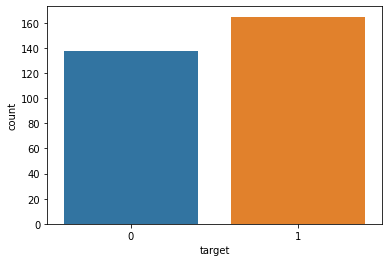

In [0]:
#here data is fairly balanced
sns.countplot(df.target)

In [0]:
duplicated_rows = df[df.duplicated()]

In [0]:
# Dropping duplicate data
df.drop(duplicated_rows.index,inplace=True)

In [0]:
# There is no null value in this dataset
df[df.isnull().any(1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# Analysis of feature

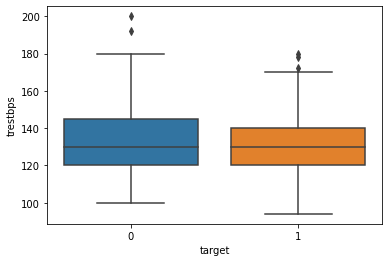

In [0]:
sns.boxplot(df['target'],df['trestbps'],data=df)

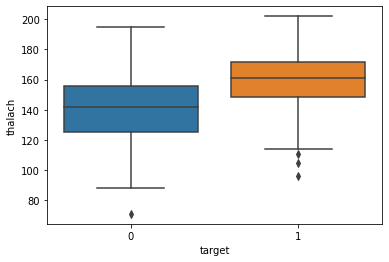

In [0]:
sns.boxplot(df['target'],df['thalach'],data=df)

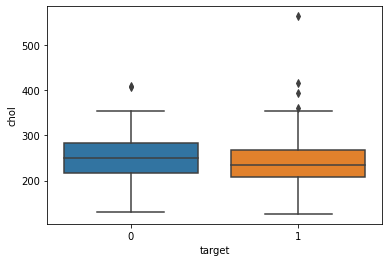

In [0]:
sns.boxplot(df['target'],df['chol'],data=df)

# Preprocessing 

There are some with categorical features. so we will convert it numerical using dummy variables.

In [0]:
# Code to find the categorical columns in the dataframe
[i for i in df.columns if len(df[i].value_counts().values)<10]

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [0]:
len(df['oldpeak'].value_counts().values)

40

In [0]:
#one hot encoding of the categorical data
dataset = pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [0]:
dataset.head(2) 

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [0]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [0]:
dataset.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


# Machine learning models

In [0]:
import csv
import os
# warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Random split (70:30)

In [0]:
X_train,X_test, y_train, y_test = train_test_split(dataset.drop('target',axis=1), df['target'],test_size=0.3)

In [0]:
print("Number of data points in X_train::",X_train.shape)
print("Number of data points in X_test::",X_test.shape)

Number of data points in X_train:: (211, 30)
Number of data points in X_test:: (91, 30)


In [0]:
print("-"*10,"Disrtribution of output variable in train data","-"*10)
train_dist = Counter(y_train)
train_len = len(y_train)
print("Class 0::",(int(train_dist[0])/train_len)*100,"%","\t","Class 1::",(int(train_dist[1])/train_len)*100,"%")

print("-"*10,"Disrtribution of output variable in test data","-"*10)
test_dist = Counter(y_test)
test_len = len(y_test)
print("Class 0::",(int(test_dist[0])/test_len)*100,"%","\t","Class 1::",(int(test_dist[1])/test_len)*100,"%")

---------- Disrtribution of output variable in train data ----------
Class 0:: 46.44549763033176 % 	 Class 1:: 53.55450236966824 %
---------- Disrtribution of output variable in test data ----------
Class 0:: 43.956043956043956 % 	 Class 1:: 56.043956043956044 %


In [0]:
def plot_confusion_matrix(y_test,y_pred):
  C = confusion_matrix(y_test,y_pred)

  plt.figure(figsize=(20,4))
  labels = [0,1]

  cmap=sns.light_palette("blue")
  plt.subplot(1, 3, 1)
  sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Confusion matrix")

  P =(C/C.sum(axis=0)) # Column sum=1
  plt.subplot(1, 3, 2)
  sns.heatmap(P, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Precision matrix")

  R =(((C.T)/(C.sum(axis=1))).T) # Row sum =1
  plt.subplot(1, 3, 3)
  # representing B in heatmap format
  sns.heatmap(R, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Recall matrix")

  print(classification_report(y_test,y_pred))

# Building a random model (Finding worst-case log-loss)

Log loss on Test data using random model:: 0.8215704689414148
              precision    recall  f1-score   support

           0       0.50      0.42      0.46        40
           1       0.60      0.67      0.63        51

    accuracy                           0.56        91
   macro avg       0.55      0.55      0.54        91
weighted avg       0.55      0.56      0.55        91



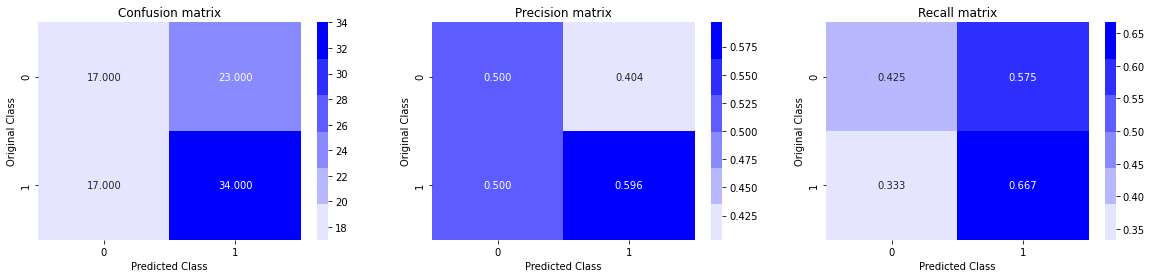

In [0]:
y_pred = np.zeros((test_len,2))
for i in range(test_len):
  rand_probs = np.random.rand(1,2)
  y_pred[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test data using random model::",log_loss(y_test,y_pred))
  

y_pred =np.argmax(y_pred, axis=1)
plot_confusion_matrix(y_test,y_pred)

# Logistic regression using hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.3537515916263844
For values of alpha =  0.0001 The log loss is: 0.35223730304421813
For values of alpha =  0.001 The log loss is: 0.3350050927341826
For values of alpha =  0.01 The log loss is: 0.3147354946304844
For values of alpha =  0.1 The log loss is: 0.31414829290154606
For values of alpha =  1 The log loss is: 0.3417726260712599
For values of alpha =  10 The log loss is: 0.35407899065079074


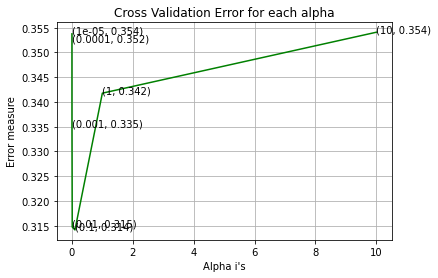

For values of best alpha =  0.1 The train log loss is: 0.37404533018490654
For values of best alpha =  0.1 The test log loss is: 0.31414829290154606
Total number of data points : 91
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.92      0.92      0.92        51

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



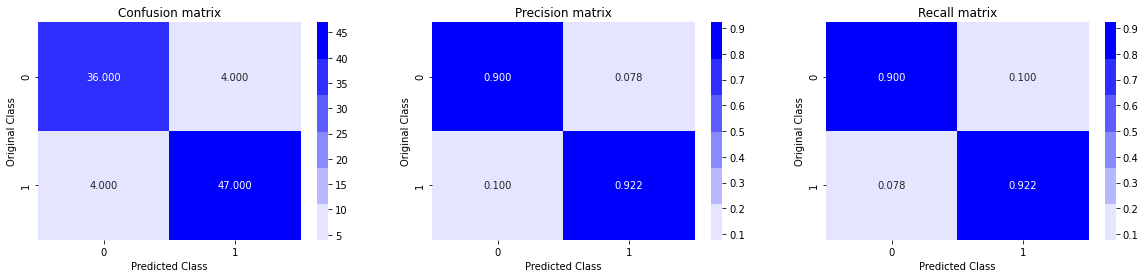

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


In [0]:
def get_imp_feature_names(indices,data):
  columns = X_test.columns.values
  for i in indices.ravel():   # ravel returns the flattened array 
    print("{} feature [{}] has value {}".format(i,columns[i],data[columns[i]]))
    


Correctly Classified point

In [0]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train,y_train)
test_point_index = 14
no_feature = 31                                                      # Total column of dataset dataframe
predicted_cls = sig_clf.predict([list(X_test.iloc[test_point_index])]) # without 2 dim ,it is giving error
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba([list(X_test.iloc[test_point_index])]),4))
print("Actual Class :", y_test.iloc[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature] # argsort return index of the items from small to larger
print("-"*50)
get_imp_feature_names(indices,X_test.iloc[test_point_index])


Predicted Class : 1
Predicted Class Probabilities: [[0.0848 0.9152]]
Actual Class : 1
--------------------------------------------------
21 feature [ca_0] has value 1.0
7 feature [cp_0] has value 0.0
4 feature [oldpeak] has value -0.8133020957967803
28 feature [thal_2] has value 1.0
29 feature [thal_3] has value 0.0
3 feature [thalach] has value 0.8497692567747798
5 feature [sex_0] has value 1.0
9 feature [cp_2] has value 1.0
16 feature [exang_0] has value 1.0
6 feature [sex_1] has value 0.0
17 feature [exang_1] has value 0.0
20 feature [slope_2] has value 0.0
22 feature [ca_1] has value 0.0
23 feature [ca_2] has value 0.0
1 feature [trestbps] has value 0.25078577913713157
19 feature [slope_1] has value 1.0
14 feature [restecg_1] has value 0.0
2 feature [chol] has value -0.9773991821409664
13 feature [restecg_0] has value 1.0
8 feature [cp_1] has value 0.0
10 feature [cp_3] has value 0.0
24 feature [ca_3] has value 0.0
25 feature [ca_4] has value 0.0
12 feature [fbs_1] has value 0.0
11

In [0]:
len(dataset.columns)

31

# Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.4221145899291641
For values of alpha =  0.0001 The log loss is: 0.41533858624341574
For values of alpha =  0.001 The log loss is: 0.3869249264049057
For values of alpha =  0.01 The log loss is: 0.3820369064632597
For values of alpha =  0.1 The log loss is: 0.3810375849011834
For values of alpha =  1 The log loss is: 0.4192936799243606
For values of alpha =  10 The log loss is: 0.4394183753783588


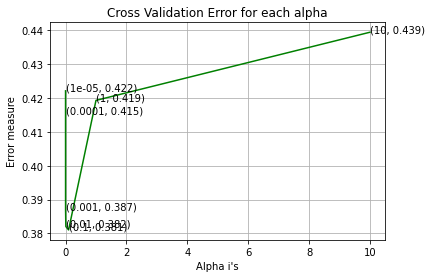

For values of best alpha =  0.1 The train log loss is: 0.34229732812579555
For values of best alpha =  0.1 The test log loss is: 0.3933973323961144
Total number of data points : 91
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        39
           1       0.82      0.87      0.84        52

    accuracy                           0.81        91
   macro avg       0.81      0.80      0.81        91
weighted avg       0.81      0.81      0.81        91



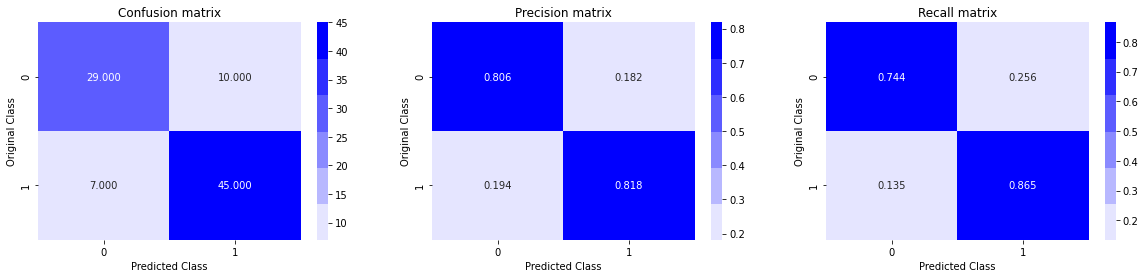

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# XGBoost

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.681245	valid-logloss:0.685732
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.583975	valid-logloss:0.625891
[20]	train-logloss:0.509092	valid-logloss:0.586954
[30]	train-logloss:0.450552	valid-logloss:0.560915
[40]	train-logloss:0.403256	valid-logloss:0.538844


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[50]	train-logloss:0.363181	valid-logloss:0.521019
[60]	train-logloss:0.329081	valid-logloss:0.504647
[70]	train-logloss:0.301029	valid-logloss:0.490044
[80]	train-logloss:0.278644	valid-logloss:0.476112
[90]	train-logloss:0.259357	valid-logloss:0.466104
[100]	train-logloss:0.242507	valid-logloss:0.457033
[110]	train-logloss:0.227238	valid-logloss:0.451316
[120]	train-logloss:0.214153	valid-logloss:0.445465
[130]	train-logloss:0.201959	valid-logloss:0.444383
[140]	train-logloss:0.191023	valid-logloss:0.441765
[150]	train-logloss:0.181044	valid-logloss:0.442621
[160]	train-logloss:0.172192	valid-logloss:0.441077
[170]	train-logloss:0.164296	valid-logloss:0.439827
[180]	train-logloss:0.156981	valid-logloss:0.440004
[190]	train-logloss:0.149676	valid-logloss:0.440675
Stopping. Best iteration:
[174]	train-logloss:0.161383	valid-logloss:0.439378

The test log loss is: 0.44009670113714844


Total number of data points : 91
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        39
           1       0.80      0.87      0.83        52

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91



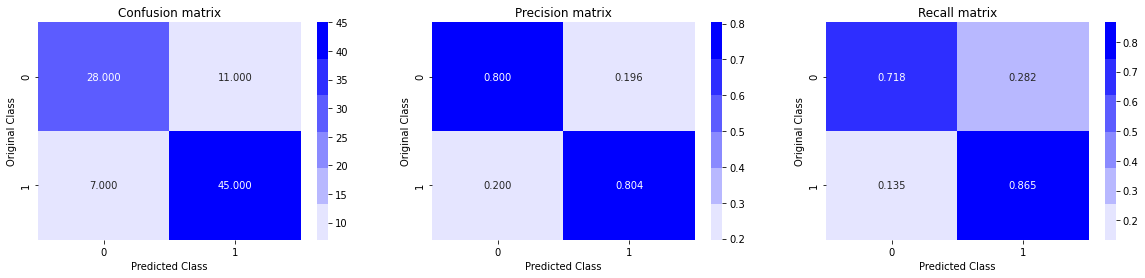

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Using default Logistic Regression of Sklearn

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.85      0.88      0.87        52

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



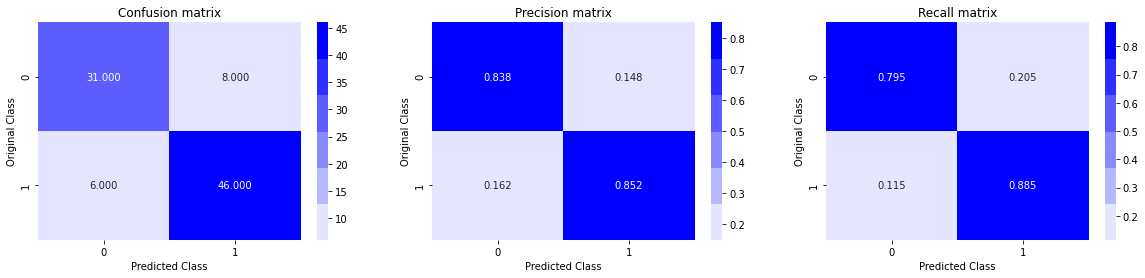

In [0]:
clf = LogisticRegression( )
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

# Using decison tree

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        39
           1       0.83      0.83      0.83        52

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



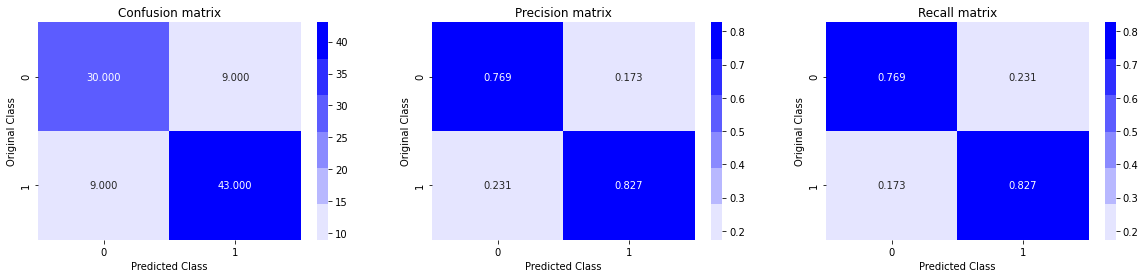

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test,y_pred)